In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import pathlib

In [52]:
def prepare_wandb_dataframe(path: str) -> pd.DataFrame:
    df = pd.read_csv(path)
    run_name = pathlib.Path(path).name.removesuffix(".csv")
    col_step = run_name + " - _step"
    col_synth = run_name + " - synthetic_valid/correctly_decoded"
    col_real = run_name + " - real_valid/correctly_decoded"
    df = df[[col_step, col_synth, col_real]]
    df = df.rename(columns={
        col_step: "step",
        col_synth: "synth_corr_dec",
        col_real: "real_corr_dec"
    })
    return df

In [78]:
def plot_decode_rates(df: pd.DataFrame, arch_name: str, enc_name: str):
    plt.figure(figsize=(5, 4))

    plt.plot(df['step'], df["synth_corr_dec"], label='Synthetic data', color="cornflowerblue", linewidth=2.5)
    plt.plot(df['step'], df["real_corr_dec"], label='Real data', color="indianred", linewidth=2.5)

    plt.xlabel('Training step', fontsize=12)
    plt.xlim(left=0)
    plt.ylim(bottom=0)
    plt.ylabel('Decode rate', fontsize=12)
    plt.title(f'Decode rate throughout the training\n(architecture {arch_name}, encoder {enc_name})', fontsize=12)
    plt.legend(loc='lower right')
    plt.grid(True, alpha=0.3)

    plt.show()

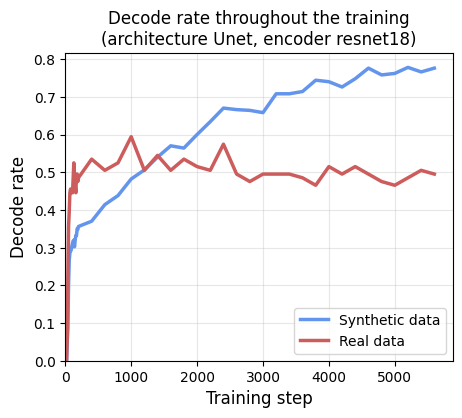

In [79]:
unet_resnet_first = prepare_wandb_dataframe("../wandb_runs_exports/dry-morning-223_Unet_resnet18__val10st.csv")
unet_resnet_second = prepare_wandb_dataframe("../wandb_runs_exports/absurd-dawn-189_Unet_resnet18_synth500.csv")

unet_resnet_df = pd.concat([unet_resnet_first, unet_resnet_second], ignore_index=True)
plot_decode_rates(unet_resnet_df, arch_name="Unet", enc_name="resnet18")

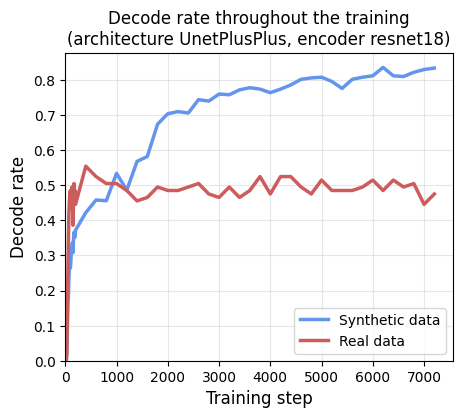

In [80]:
unet_pp_resnet_first = prepare_wandb_dataframe("../wandb_runs_exports/likely-spaceship-224_Unet++_resnet18__val10st.csv")
unet_pp_resnet_second = prepare_wandb_dataframe("../wandb_runs_exports/different-bee-190_Unet++_resnet18_synth500.csv")

unet_pp_resnet_df = pd.concat([unet_pp_resnet_first, unet_pp_resnet_second], ignore_index=True)
plot_decode_rates(unet_pp_resnet_df, arch_name="UnetPlusPlus", enc_name="resnet18")

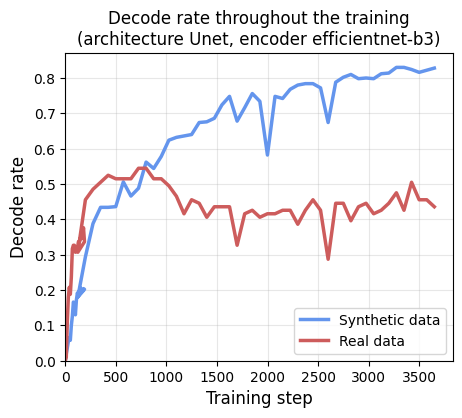

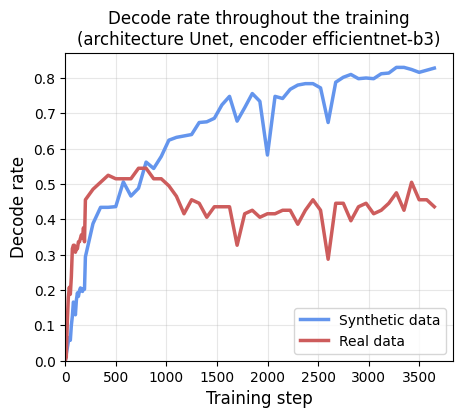

In [81]:
unet_effnet_first = prepare_wandb_dataframe("../wandb_runs_exports/generous-dragon-226_Unet_efficientnet-b3__val10st.csv")
unet_effnet_second = prepare_wandb_dataframe("../wandb_runs_exports/fragrant-yogurt-186_Unet_eff-b3_synth500.csv")

unet_effnet_df = pd.concat([unet_effnet_first, unet_effnet_second], ignore_index=True)
plot_decode_rates(unet_effnet_df, arch_name="Unet", enc_name="efficientnet-b3")
plot_decode_rates(unet_effnet_df.drop(20), arch_name="Unet", enc_name="efficientnet-b3")

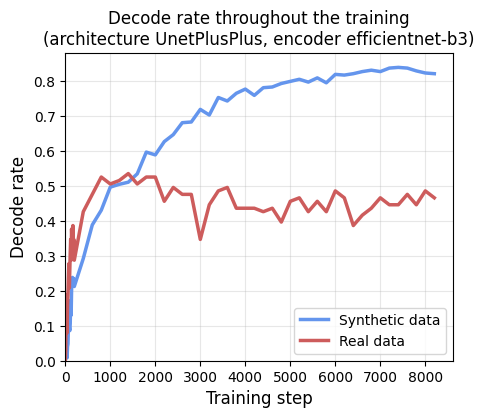

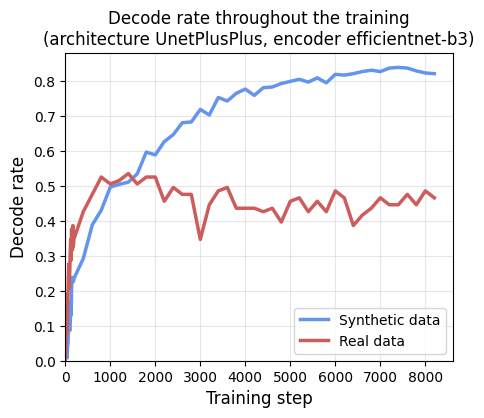

In [82]:
unet_pp_effnet_first = prepare_wandb_dataframe("../wandb_runs_exports/iconic-shape-227_Unet++_efficientnet-b3__val10st.csv")
unet_pp_effnet_second = prepare_wandb_dataframe("../wandb_runs_exports/balmy-forest-188_Unet++_eff-b3_synth500.csv")

unet_pp_effnet_df = pd.concat([unet_pp_effnet_first, unet_pp_effnet_second], ignore_index=True)
plot_decode_rates(unet_pp_effnet_df, arch_name="UnetPlusPlus", enc_name="efficientnet-b3")
plot_decode_rates(unet_pp_effnet_df.drop(20), arch_name="UnetPlusPlus", enc_name="efficientnet-b3")

In [83]:
unet_effnet_df[15:25]

,step,synth_corr_dec,real_corr_dec
15,150,0.206,0.346535
16,160,0.198,0.356436
17,170,0.196,0.346535
18,180,0.204,0.376238
19,190,0.202,0.336634
20,124,0.180,0.306931
21,199,0.294,0.455446
22,274,0.388,0.485149
23,349,0.434,0.504951
24,424,0.434,0.524752
